In [13]:
# investing.com provides the most accurate and clean data for Turkish Equity Market
import investpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
start_date='01/10/2018'
end_date = '01/05/2019'
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 300

In [14]:
bist = pd.DataFrame({
                       'akbnk' : investpy.get_stock_historical_data(stock='AKBNK', country='turkey', from_date=start_date, to_date=end_date)['Close'], 
                       
                       
                       
                       'dohol' : investpy.get_stock_historical_data(stock='DOHOL', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'enjsa' : investpy.get_stock_historical_data(stock='ENJSA', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'enkai' : investpy.get_stock_historical_data(stock='ENKAI', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'eregl' : investpy.get_stock_historical_data(stock='EREGL', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                      
                       'garan' : investpy.get_stock_historical_data(stock='GARAN', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'halkb' : investpy.get_stock_historical_data(stock='HALKB', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                     
                       'krdmd' : investpy.get_stock_historical_data(stock='KRDMD', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                     
                       'petkm' : investpy.get_stock_historical_data(stock='PETKM', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'sahol' : investpy.get_stock_historical_data(stock='SAHOL', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'sasa' : investpy.get_stock_historical_data(stock='SASA', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'soda' : investpy.get_stock_historical_data(stock='SODA', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                      
                      
                      
                      
                      
                       'trkcm' : investpy.get_stock_historical_data(stock='TRKCM', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'tskb' : investpy.get_stock_historical_data(stock='TSKB', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'ttkom' : investpy.get_stock_historical_data(stock='TTKOM', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                     
                     
                       'vakbn' : investpy.get_stock_historical_data(stock='VAKBN', country='turkey', from_date=start_date, to_date=end_date)['Close'],
                       'ykbnk' : investpy.get_stock_historical_data(stock='YKBNK', country='turkey', from_date=start_date, to_date=end_date)['Close']})

In [15]:
# create weekly bist dataframe by bist_w
bist_w = bist.resample('M').last()
bist_w = bist_w.pct_change()
bist_w = bist_w.dropna()

In [16]:
# sort the first week's returns and create a concatinated dataframe
# to display all the weeks' sorted returns again

display_weeks = pd.DataFrame(bist_w[0:1])
display_weeks = display_weeks.transpose()
display_weeks = display_weeks.sort_values(by=str(display_weeks.columns[0]), ascending=False)

# this loop goes over each week and take its return for 
# display_weeks --> to display all week's sorted return values

for i in range(len(bist_w.index)):
    sorted_week = pd.DataFrame(bist_w[i:i+1])
    sorted_week = sorted_week.transpose()
    sorted_week = sorted_week.sort_values(by=str(sorted_week.columns[0]), ascending=False)
    display_weeks = pd.concat([display_weeks.reset_index(drop=0), sorted_week.reset_index(drop=0)], axis=1)
    display_weeks = display_weeks.rename(columns={'index': 'week{}'.format(i+1)})
    

# set the last adjustment to display all the weeks properly
display_weeks = display_weeks.iloc[:,len(bist_w.index)+1:]  

# total_weeks --> an array to make calculations later
total_weeks = []
for j in range(int(len(display_weeks.columns)/2)):
    total_weeks.append(display_weeks.iloc[:,2*j:2*j+2].values)
    

In [17]:
display_weeks

Date,week1,2018-11-30 00:00:00,week2,2018-12-31 00:00:00,week3,2019-01-31 00:00:00,week4,2019-02-28 00:00:00,week5,2019-03-31 00:00:00,week6,2019-04-30 00:00:00
0,ttkom,0.221875,tskb,0.025316,ttkom,0.292308,ykbnk,0.102564,dohol,0.008850,enkai,0.169935
1,garan,0.183119,enjsa,0.024096,sahol,0.246011,eregl,0.097840,ykbnk,-0.009302,enjsa,0.130252
2,vakbn,0.172515,ttkom,-0.002558,vakbn,0.225641,vakbn,0.079498,soda,-0.015838,sasa,0.042239
3,halkb,0.168558,soda,-0.007045,ykbnk,0.218750,ttkom,0.077381,eregl,-0.021582,soda,0.034705
4,akbnk,0.158730,enkai,-0.014842,akbnk,0.204082,soda,0.062793,garan,-0.065022,sahol,0.021220
5,sahol,0.155899,halkb,-0.026352,krdmd,0.201848,trkcm,0.060676,sasa,-0.069797,eregl,0.004412
6,sasa,0.155372,vakbn,-0.027431,trkcm,0.197992,enkai,0.012146,akbnk,-0.080058,tskb,-0.013158
7,tskb,0.112676,trkcm,-0.028908,eregl,0.175844,krdmd,0.011331,enkai,-0.082000,petkm,-0.015506
8,ykbnk,0.067901,garan,-0.037485,petkm,0.144744,enjsa,0.010714,krdmd,-0.094438,garan,-0.020384
9,dohol,0.055046,eregl,-0.048644,garan,0.138191,halkb,0.006579,tskb,-0.095238,ttkom,-0.020690


In [18]:
# each week, create an array that contains the stocks to be long and short
n = 8 # maximum number of stocks to be selected for long and short portfolios (total maximum of 2n)
long = []
short = []

In [19]:
from itertools import chain, combinations
# create new lists for combinations (nested loops)

g = globals()                          # to create a dynamic named list
week_number = 5                        # for what week do you want to make those all combinations?
minimum_combination = 1                # number of minimum combination for individiual long&short portfolios


In [20]:
# loop to construct selection base for long and short stocks

for i in range(len(total_weeks)):
    
    if len(total_weeks[i])%2==0:
        
        index = int(len(total_weeks[i])/2) # find index corresponding to near median return in a week
        
        long_for_week = [] # a list for long stocks for that particular week
        long_for_week.append(total_weeks[i][index+1:index+n+1]) # less returns than median are put in long list
        short_for_week = [] # a list for short stocks for that particular week
        short_for_week.append(total_weeks[i][index-n-1:index-1]) # more returns than median are put in short list
        long.append(long_for_week) # for backtest purposes, long-short portfolio are put in historical long-short portfolio
        short.append(short_for_week)
        
    elif len(total_weeks[i])%2==1:
        
        index = int(len(total_weeks[i])/2) # find index corresponding to near median return in a week
        
        long_for_week = [] # a list for long stocks for that particular week
        long_for_week.append(total_weeks[i][index+1:index+n+1]) # less returns than median are put in long list
        
        short_for_week = [] # a list for short stocks for that particular week
        short_for_week.append(total_weeks[i][index-n:index]) # more returns than median are put in short list
        
        long.append(long_for_week) # for backtest purposes, long-short portfolio are put in historical long-short portfolio
        short.append(short_for_week)
        

In [21]:
long

[[array([['dohol', 0.05504587155963292],
         ['soda', 0.05464396284829709],
         ['petkm', 0.04333585285966235],
         ['enjsa', 0.03319502074688807],
         ['enkai', -0.0044967880085653444],
         ['trkcm', -0.045862732520846605],
         ['eregl', -0.16233511819250368],
         ['krdmd', -0.17325017325017322]], dtype=object)],
 [array([['eregl', -0.04864359214218883],
         ['petkm', -0.04902197536826847],
         ['ykbnk', -0.07514450867052014],
         ['sahol', -0.08626974483596606],
         ['akbnk', -0.10502283105022836],
         ['dohol', -0.11304347826086947],
         ['krdmd', -0.13830678960603526],
         ['sasa', -0.14592274678111594]], dtype=object)],
 [array([['garan', 0.13819095477386933],
         ['dohol', 0.1078431372549018],
         ['enjsa', 0.0980392156862746],
         ['halkb', 0.0826210826210827],
         ['enkai', 0.0786026200873362],
         ['sasa', 0.058626465661641536],
         ['tskb', 0.04938271604938271],
         ['soda

In [22]:
# create all combinations within arranged width for individiaul long portfolios
for i in range(minimum_combination, n+1):
    combination_number = i
    g['long_comb{}_week{}'.format(combination_number, week_number)] = []   # dynamic list naming for our combinations and weeks
    comb = combinations(long[week_number-1][0], combination_number)   # taking combinatins with special function 'comb'
    for i in list(comb): 
        g['long_comb{}_week{}'.format(combination_number, week_number)].append(i)  #adding each combination in their specific groups
        
        

# create all combinations within arranged width for individiaul short portfolios
for i in range(minimum_combination, n+1):
    combination_number = i
    g['short_comb{}_week{}'.format(combination_number, week_number)] = []   # dynamic list naming for our combinations and weeks
    comb = combinations(short[week_number-1][0], combination_number)   # taking combinatins with special function 'comb'
    for i in list(comb): 
        g['short_comb{}_week{}'.format(combination_number, week_number)].append(i)  #adding each combination in their specific groups
    

In [23]:
# create a list for long stocks containing all combinations of long_comb#_week#
g['all_longs_week{}'.format(week_number)] = []
for i in range(minimum_combination, n+1):
    combination_number = i
    g['all_longs_week{}'.format(week_number)].append(g['long_comb{}_week{}'.format(combination_number, week_number)])
    
# create a list for short stocks containing all combinations of short_comb#_week#    
g['all_shorts_week{}'.format(week_number)] = []
for i in range(minimum_combination, n+1):
    combination_number = i
    g['all_shorts_week{}'.format(week_number)].append(g['short_comb{}_week{}'.format(combination_number, week_number)])

In [24]:
# create combination portfolios containing long-short combinations of (5x5, 5x6, 5x7 ... 6x5, 6x6 ... 11x5, 11x6..)
# but let's name each portfolio with its combinations port(long_comb x short_comb), for example: (port_5x5, port_5x6 ... port_11x5.. port_11x11)

long_comb = minimum_combination
short_comb = minimum_combination

for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)] = []  # to have an empty list of #x# portfolio, we need to create it first


for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        
        # iterate for all j-minimum_combination's combinations in all_longs_week# 
        # the reason for [j-minimum_combination] iteration is that the first #x# type of combination is located in 0 in all_longs_week#
        
        for k in range(len(g['all_longs_week{}'.format(week_number)][long_comb-minimum_combination])):
            temporary_comb1 = g['all_longs_week{}'.format(week_number)][long_comb-minimum_combination][k]    # with temporary_comb1 it's possible to memorize the itertion in for example all_longs_week[0]'s first element (5's combinations)  
            
            for z in range(len(g['all_shorts_week{}'.format(week_number)][short_comb-minimum_combination])):
                temporary_comb2 = g['all_shorts_week{}'.format(week_number)][short_comb-minimum_combination][z]   # temporary_comb2 memorizes the short week's specific combination's iterations
                temporary_comb_ = np.array([ temporary_comb1 , temporary_comb2])       # to keep long-short combinations together in a specific list
                g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)].append(temporary_comb_)      #then combinations are added as a portfolio

In [25]:
# define a function to see total number of long-short portfolio (for ex: port5x8) combinations
total_number_of_combinations = 0   

for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        len_ = g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)]  # a new list to make it more clear
        total_number_of_combinations += len(len_)     #add all combinations' length to the integer to find the total number of combinations
        
print(total_number_of_combinations)

65025


In [26]:
# detect the names of long and short stocks and derive a portfolio that save the historical performance of that portfolio
# start with dynamically naming our test portfolios that will memorize long stocks name 

for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        
        for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
            g['tlong_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)] = []
            
# now we have named the list of long stocks in our portfolio, but the names are not memorized since we only created an empty list
# let's do it the same way for short stocks to memorize the names of them to be used in backtest of our portfolios

for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        
        for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
            g['tshort_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)] = []



In [27]:
# memorize the stocks name that are in each port_#x#
# tlong will memorize long stocks specified for each portfolio whereas tshort memorizes the short stocks
# thus, we will be able to implement a daily backtest for our filters
# we need the stocks' names for the backtests 

for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        
        for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])): 
            # we iterate through each unique port_#x#_week# to add the stocks' names 
            
            for z in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)][k][0])):  #the long stocks are stored in [0]
                temp_ = g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)][k][0][z][0]
                g['tlong_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)].append(temp_)
                
                
for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        
        for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
            
            for z in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)][k][1])):   #the short stocks are stored in [1]
                temp_ = g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)][k][1][z][0]
                g['tshort_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)].append(temp_)

In [28]:
# Now, everything is arranged. 
# We have long_comb#(all combinations), all_longs_week#(all combinations of longs), 
# port#x#_week# (all combinations of L/S portfolios), tlong_#x#_week# (all long stocks' names of that particular portfolio)
# The same applies to short versions of the above terms.
# All we need is to properly take stocks' names, use the portfolios of port_#x# 
# At the end, we will have one long portfolio and one short portfolio, so that we could find these two assets' cointegration

In [29]:
# we will backtest in daily data so we will use bist rather than bist_w
bist = bist.pct_change()
bist = bist.dropna()
print(week_number)

5


In [30]:
display_weeks

Date,week1,2018-11-30 00:00:00,week2,2018-12-31 00:00:00,week3,2019-01-31 00:00:00,week4,2019-02-28 00:00:00,week5,2019-03-31 00:00:00,week6,2019-04-30 00:00:00
0,ttkom,0.221875,tskb,0.025316,ttkom,0.292308,ykbnk,0.102564,dohol,0.008850,enkai,0.169935
1,garan,0.183119,enjsa,0.024096,sahol,0.246011,eregl,0.097840,ykbnk,-0.009302,enjsa,0.130252
2,vakbn,0.172515,ttkom,-0.002558,vakbn,0.225641,vakbn,0.079498,soda,-0.015838,sasa,0.042239
3,halkb,0.168558,soda,-0.007045,ykbnk,0.218750,ttkom,0.077381,eregl,-0.021582,soda,0.034705
4,akbnk,0.158730,enkai,-0.014842,akbnk,0.204082,soda,0.062793,garan,-0.065022,sahol,0.021220
5,sahol,0.155899,halkb,-0.026352,krdmd,0.201848,trkcm,0.060676,sasa,-0.069797,eregl,0.004412
6,sasa,0.155372,vakbn,-0.027431,trkcm,0.197992,enkai,0.012146,akbnk,-0.080058,tskb,-0.013158
7,tskb,0.112676,trkcm,-0.028908,eregl,0.175844,krdmd,0.011331,enkai,-0.082000,petkm,-0.015506
8,ykbnk,0.067901,garan,-0.037485,petkm,0.144744,enjsa,0.010714,krdmd,-0.094438,garan,-0.020384
9,dohol,0.055046,eregl,-0.048644,garan,0.138191,halkb,0.006579,tskb,-0.095238,ttkom,-0.020690


In [31]:
until = '2019-03-31'

bist['garan'][:until]

Date
2018-10-02   -0.005450
2018-10-03   -0.026027
2018-10-04   -0.075949
2018-10-05    0.027397
2018-10-08    0.066667
                ...   
2019-03-25   -0.047930
2019-03-26   -0.033181
2019-03-27   -0.088757
2019-03-28    0.032468
2019-03-29    0.049057
Name: garan, Length: 127, dtype: float64

In [32]:
forward_number = 22

In [33]:
until = len(bist['garan'][:until])
bist['garan'][until:until+forward_number]

Date
2019-04-01   -0.023981
2019-04-02   -0.019656
2019-04-03    0.028822
2019-04-04    0.069428
2019-04-05    0.026196
2019-04-08   -0.022198
2019-04-09    0.009081
2019-04-10   -0.010124
2019-04-11   -0.004545
2019-04-12   -0.036530
2019-04-15    0.002370
2019-04-16    0.015366
2019-04-17    0.012806
2019-04-18   -0.024138
2019-04-19   -0.004711
2019-04-22   -0.018935
2019-04-24    0.026538
2019-04-25   -0.044653
2019-04-26    0.002460
2019-04-29   -0.025767
2019-04-30    0.028967
Name: garan, dtype: float64

In [34]:
# To construct our long portfolio that will include all long stocks of the combinations
# For example: if our portfolio is port_5x5_week30,
from time import time

def naming(minimum_combination, n, week_number):
    for i in range(minimum_combination, n+1):
        long_comb = i
    
        for j in range(minimum_combination, n+1):
            short_comb = j
        
            for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
                g['backtest_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)] = []
                

def create_artificial_long_port(minimum_combination, n, week_number):
    for i in range(minimum_combination, n+1):
        long_comb = i
    
        for j in range(minimum_combination, n+1):
            short_comb = j
        
            for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
                    portfolio_to_add = g['tlong_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)]
                    long_portfolio_return = []
                    append_func = long_portfolio_return.append
                
                    for s in portfolio_to_add:   
                        return_to_memorize = []
                        return_to_memorize.append(bist[s][:until])
                        append_func(return_to_memorize)
                    
                    new_portfolio = []
                    append_func = new_portfolio.append
                    
                    for u in range(len(long_portfolio_return)):
                        weighted_stock_return = [ x/long_comb for x in long_portfolio_return[u]]
                        append_func(weighted_stock_return)
                                                          
                    last_long_list  = np.zeros((len(new_portfolio[0]), len(new_portfolio[0][0])))
                    for t in range(len(new_portfolio)):
                        last_long_list += new_portfolio[t]
                
                    g['backtest_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)].append(last_long_list)

def create_artificial_short_port(minimum_combination, n, week_number):
    for i in range(minimum_combination, n+1):
        long_comb = i
    
        for j in range(minimum_combination, n+1):
            short_comb = j
        
            for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
                    portfolio_to_add = g['tshort_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)]
                    short_portfolio_return = []
                    append_func = short_portfolio_return.append
                
                    for s in portfolio_to_add:
                        return_to_memorize = []
                        return_to_memorize.append(bist[s][:until])
                        append_func(return_to_memorize)
                    

                    new_portfolio = []
                    append_func = new_portfolio.append
                
                    for u in range(len(short_portfolio_return)):
                        weighted_stock_return = [ x/short_comb for x in short_portfolio_return[u]]
                        append_func(weighted_stock_return)
                                                          
                    last_short_list  = np.zeros( (len(new_portfolio[0]), len(new_portfolio[0][0])) )
                    for t in range(len(new_portfolio)):
                        last_short_list += new_portfolio[t]
                        
                    g['backtest_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)].append(last_short_list)
                    

In [35]:
t0 = time()  
naming(minimum_combination, n, week_number)
t1 = time()                    
create_artificial_long_port(minimum_combination, n, week_number)      
t2 = time()
create_artificial_short_port(minimum_combination, n, week_number)
t3 = time()
print('naming function takes %f'%(t1-t0))
print('backtest function takes %f' %(t3-t1))

naming function takes 0.124871
backtest function takes 174.022858


In [36]:
def naming_forward(minimum_combination, n, week_number, forward_number):
    for i in range(minimum_combination, n+1):
        long_comb = i
    
        for j in range(minimum_combination, n+1):
            short_comb = j
        
            for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
                g['forward_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)] = []
                

def create_artificial_long_port_forward(minimum_combination, n, week_number, forward_number):
    for i in range(minimum_combination, n+1):
        long_comb = i
    
        for j in range(minimum_combination, n+1):
            short_comb = j
        
            for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
                    portfolio_to_add = g['tlong_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)]
                    long_portfolio_return = []
                    append_func = long_portfolio_return.append
                
                    for s in portfolio_to_add:   
                        return_to_memorize = []
                        return_to_memorize.append(bist[s][until:(until+forward_number)])
                        append_func(return_to_memorize)
                    
                    new_portfolio = []
                    append_func = new_portfolio.append
                    
                    for u in range(len(long_portfolio_return)):
                        weighted_stock_return = [ x/long_comb for x in long_portfolio_return[u]]
                        append_func(weighted_stock_return)
                                                          
                    last_long_list  = np.zeros((len(new_portfolio[0]), len(new_portfolio[0][0])))
                    for t in range(len(new_portfolio)):
                        last_long_list += new_portfolio[t]
                
                    g['forward_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)].append(last_long_list)

def create_artificial_short_port_forward(minimum_combination, n, week_number, forward_number):
    for i in range(minimum_combination, n+1):
        long_comb = i
    
        for j in range(minimum_combination, n+1):
            short_comb = j
        
            for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
                    portfolio_to_add = g['tshort_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)]
                    short_portfolio_return = []
                    append_func = short_portfolio_return.append
                
                    for s in portfolio_to_add:
                        return_to_memorize = []
                        return_to_memorize.append(bist[s][until:(until+forward_number)])
                        append_func(return_to_memorize)
                    

                    new_portfolio = []
                    append_func = new_portfolio.append
                
                    for u in range(len(short_portfolio_return)):
                        weighted_stock_return = [ x/short_comb for x in short_portfolio_return[u]]
                        append_func(weighted_stock_return)
                                                          
                    last_short_list  = np.zeros( (len(new_portfolio[0]), len(new_portfolio[0][0])) )
                    for t in range(len(new_portfolio)):
                        last_short_list += new_portfolio[t]
                        
                    g['forward_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)].append(last_short_list)
                    

In [37]:
t0 = time()  
naming_forward(minimum_combination, n, week_number, forward_number)
t1 = time()                    
create_artificial_long_port_forward(minimum_combination, n, week_number, forward_number)      
t2 = time()
create_artificial_short_port_forward(minimum_combination, n, week_number, forward_number)
t3 = time()
print('naming function takes %f'%(t1-t0))
print('forward function takes %f' %(t3-t1))

naming function takes 0.122293
forward function takes 163.583436


In [38]:
t0 = time() 
for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        
        for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
            g['backtest_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)][0] = pd.Series(g['backtest_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)][0][0]).cumsum().apply(np.exp)
            g['backtest_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)][1] = pd.Series(g['backtest_{}x{}_{}_week{}'.format(long_comb, short_comb, k, week_number)][1][0]).cumsum().apply(np.exp)

            
t1 = time() 
print('cumsum backtest construction %f'%(t1-t0))

cumsum backtest construction 35.648122


In [ ]:
# create function to filter all portfolios based on their half-life values
from numpy import *
def half_life(x):  
    """  
    adf(x) - Calculate adf stat, p-value and half-life of the given list. This test will tell us if a  
             time series is mean reverted.  
             e.g. adf(prices)  
    :param x: A pandas.Series of data.  
    :return: (stat, p_value, half_life)  
    Reference  
        http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html  
        http://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test  
    """  
    # Calculate ADF to get ADF stats and p-value  


    # Calculate the half-life of reversion  
    price = pd.Series(x)  
    lagged_price = price.shift(1).fillna(method="bfill")  
    delta = price - lagged_price  
    beta = np.polyfit(lagged_price, delta, 1)[0] #Use price(t-1) to predicate delta.  
    half_life = (-1*log(2)/beta)  
    return  half_life


In [ ]:
'''t0=time()
import statsmodels.api as sm
from statsmodels import regression
import statsmodels
from statsmodels.tsa.stattools import coint


joh_filter = []
append_func = joh_filter.append

for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        
        for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
            x = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0][-60:]
            y = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1][-60:]
            score, pvalue, _ = coint(x, y)
            if pvalue <= 0.05:
                delta = 1e-3
                trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
                obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)

                kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
                  initial_state_mean=[0,0],
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=2,
                  transition_covariance=trans_cov)
                kf.em(  
                    X       = x.values,  
                    n_iter  = 10,  
                    em_vars = [  
                        'initial_state_covariance',  
                        'transition_covariance',  
                        'observation_covariance'  
                    ]  
                )
                state_means, state_covs = kf.filter(y.values)
                beta = state_means[-1,0]
                hedged_port_to_add = beta*g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0]-g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1]
                append_func(pd.Series(hedged_port_to_add))
                joh_filter[-1].name = '{}x{}_{}'.format(i, j, k)
t1=time()    
print('beta construction %f'%(t1-t0))
print('len(joh_filter) ', len(joh_filter))'''

In [43]:
t0=time()
import statsmodels.api as sm
from statsmodels import regression
import statsmodels
from statsmodels.tsa.stattools import coint


joh_filter = []
append_func = joh_filter.append

for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        
        for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
            x = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0][-60:]
            y = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1][-60:]
            score, pvalue, _ = coint(x, y)
            if pvalue <= 0.05:
                x1 = sm.add_constant(x[-30:].values)
                y1 = y[-30:].values
                model = regression.linear_model.OLS(y1, x1).fit()
                beta = model.params[1]
                if (beta > 0.80) & (beta < 1.15):
                    hedged_port_to_add = beta*g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0]-g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1]
                    append_func(pd.Series(hedged_port_to_add))
                    joh_filter[-1].name = '{}x{}_{}'.format(i, j, k)
t1=time()    
print('beta construction %f'%(t1-t0))
print('len(joh_filter) ', len(joh_filter))

beta construction 483.004719
len(joh_filter)  4


In [39]:
'''t0=time()
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels
from statsmodels.tsa.stattools import coint

joh_filter = []
append_func = joh_filter.append

for i in range(minimum_combination, n+1):
    long_comb = i
    
    for j in range(minimum_combination, n+1):
        short_comb = j
        
        for k in range(len(g['port_{}x{}_week{}'.format(long_comb, short_comb, week_number)])):
            x = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0][-60:]
            y = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1][-60:]
            score, pvalue, _ = coint(x, y)
            if pvalue <= 0.10:
                df = pd.DataFrame({'x':x[-30:], 'y':y[-30:]}) # dataframe of n series for cointegration analysis
                jres = coint_johansen(df, det_order=0, k_ar_diff=1)
                if (jres.lr1[0] > jres.cvt[0][1]) & (jres.lr1[1] > jres.cvt[1][0]) & (jres.lr2[0] > jres.cvm[0][1]) & (jres.lr2[1] > jres.cvm[1][0]):
                    beta = -jres.evec[0][0]/jres.evec[1][0]
                    if (beta > 0.65) & (beta < 1.30):
                        hedged_port_to_add = beta*g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0]-g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1]
                        append_func(pd.Series(hedged_port_to_add))
                        joh_filter[-1].name = '{}x{}_{}'.format(i, j, k)

t1=time()    
print('johansen filter construction %f'%(t1-t0))
print('len(joh_filter)  ', len(joh_filter))'''

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


johansen filter construction 579.969882
len(joh_filter)   0


In [111]:
from statsmodels.tsa.stattools import adfuller
t0=time()
ad_filter = []
append_func=ad_filter.append
for i in range(len(joh_filter)):
    if adfuller(joh_filter[i][-30:])[1] <= 0.05:
        append_func(joh_filter[i])
print(len(ad_filter))
t1=time() 
print(t1-t0)

1
0.02001166343688965


In [112]:
bol_filter=[]
append_func = bol_filter.append
for i in range(len(ad_filter)):
    band = ad_filter[i].rolling(window=20).mean()-2*ad_filter[i].rolling(window=20).std()
    if ad_filter[i].values[-1] < band[len(band)-1]:
        append_func(ad_filter[i])
        
print(len(bol_filter))

1


In [113]:
bol_filter

[0     -0.095533
 1     -0.095972
 2     -0.066016
 3     -0.051246
 4     -0.083629
          ...   
 122   -0.111641
 123   -0.118939
 124   -0.093794
 125   -0.163920
 126   -0.219202
 Name: 3x1_254, Length: 127, dtype: float64]

In [114]:
import statsmodels.api as sm
from statsmodels import regression

i = 3
j = 1
k = 254
x = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0][-30:]
y = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1][-30:]

x1 = sm.add_constant(x[-30:].values)
y1 = y[-30:].values
model = regression.linear_model.OLS(y1, x1).fit()
beta = model.params[1]
print(beta)

0.893679189863545


Return is   -0.03432183202561123


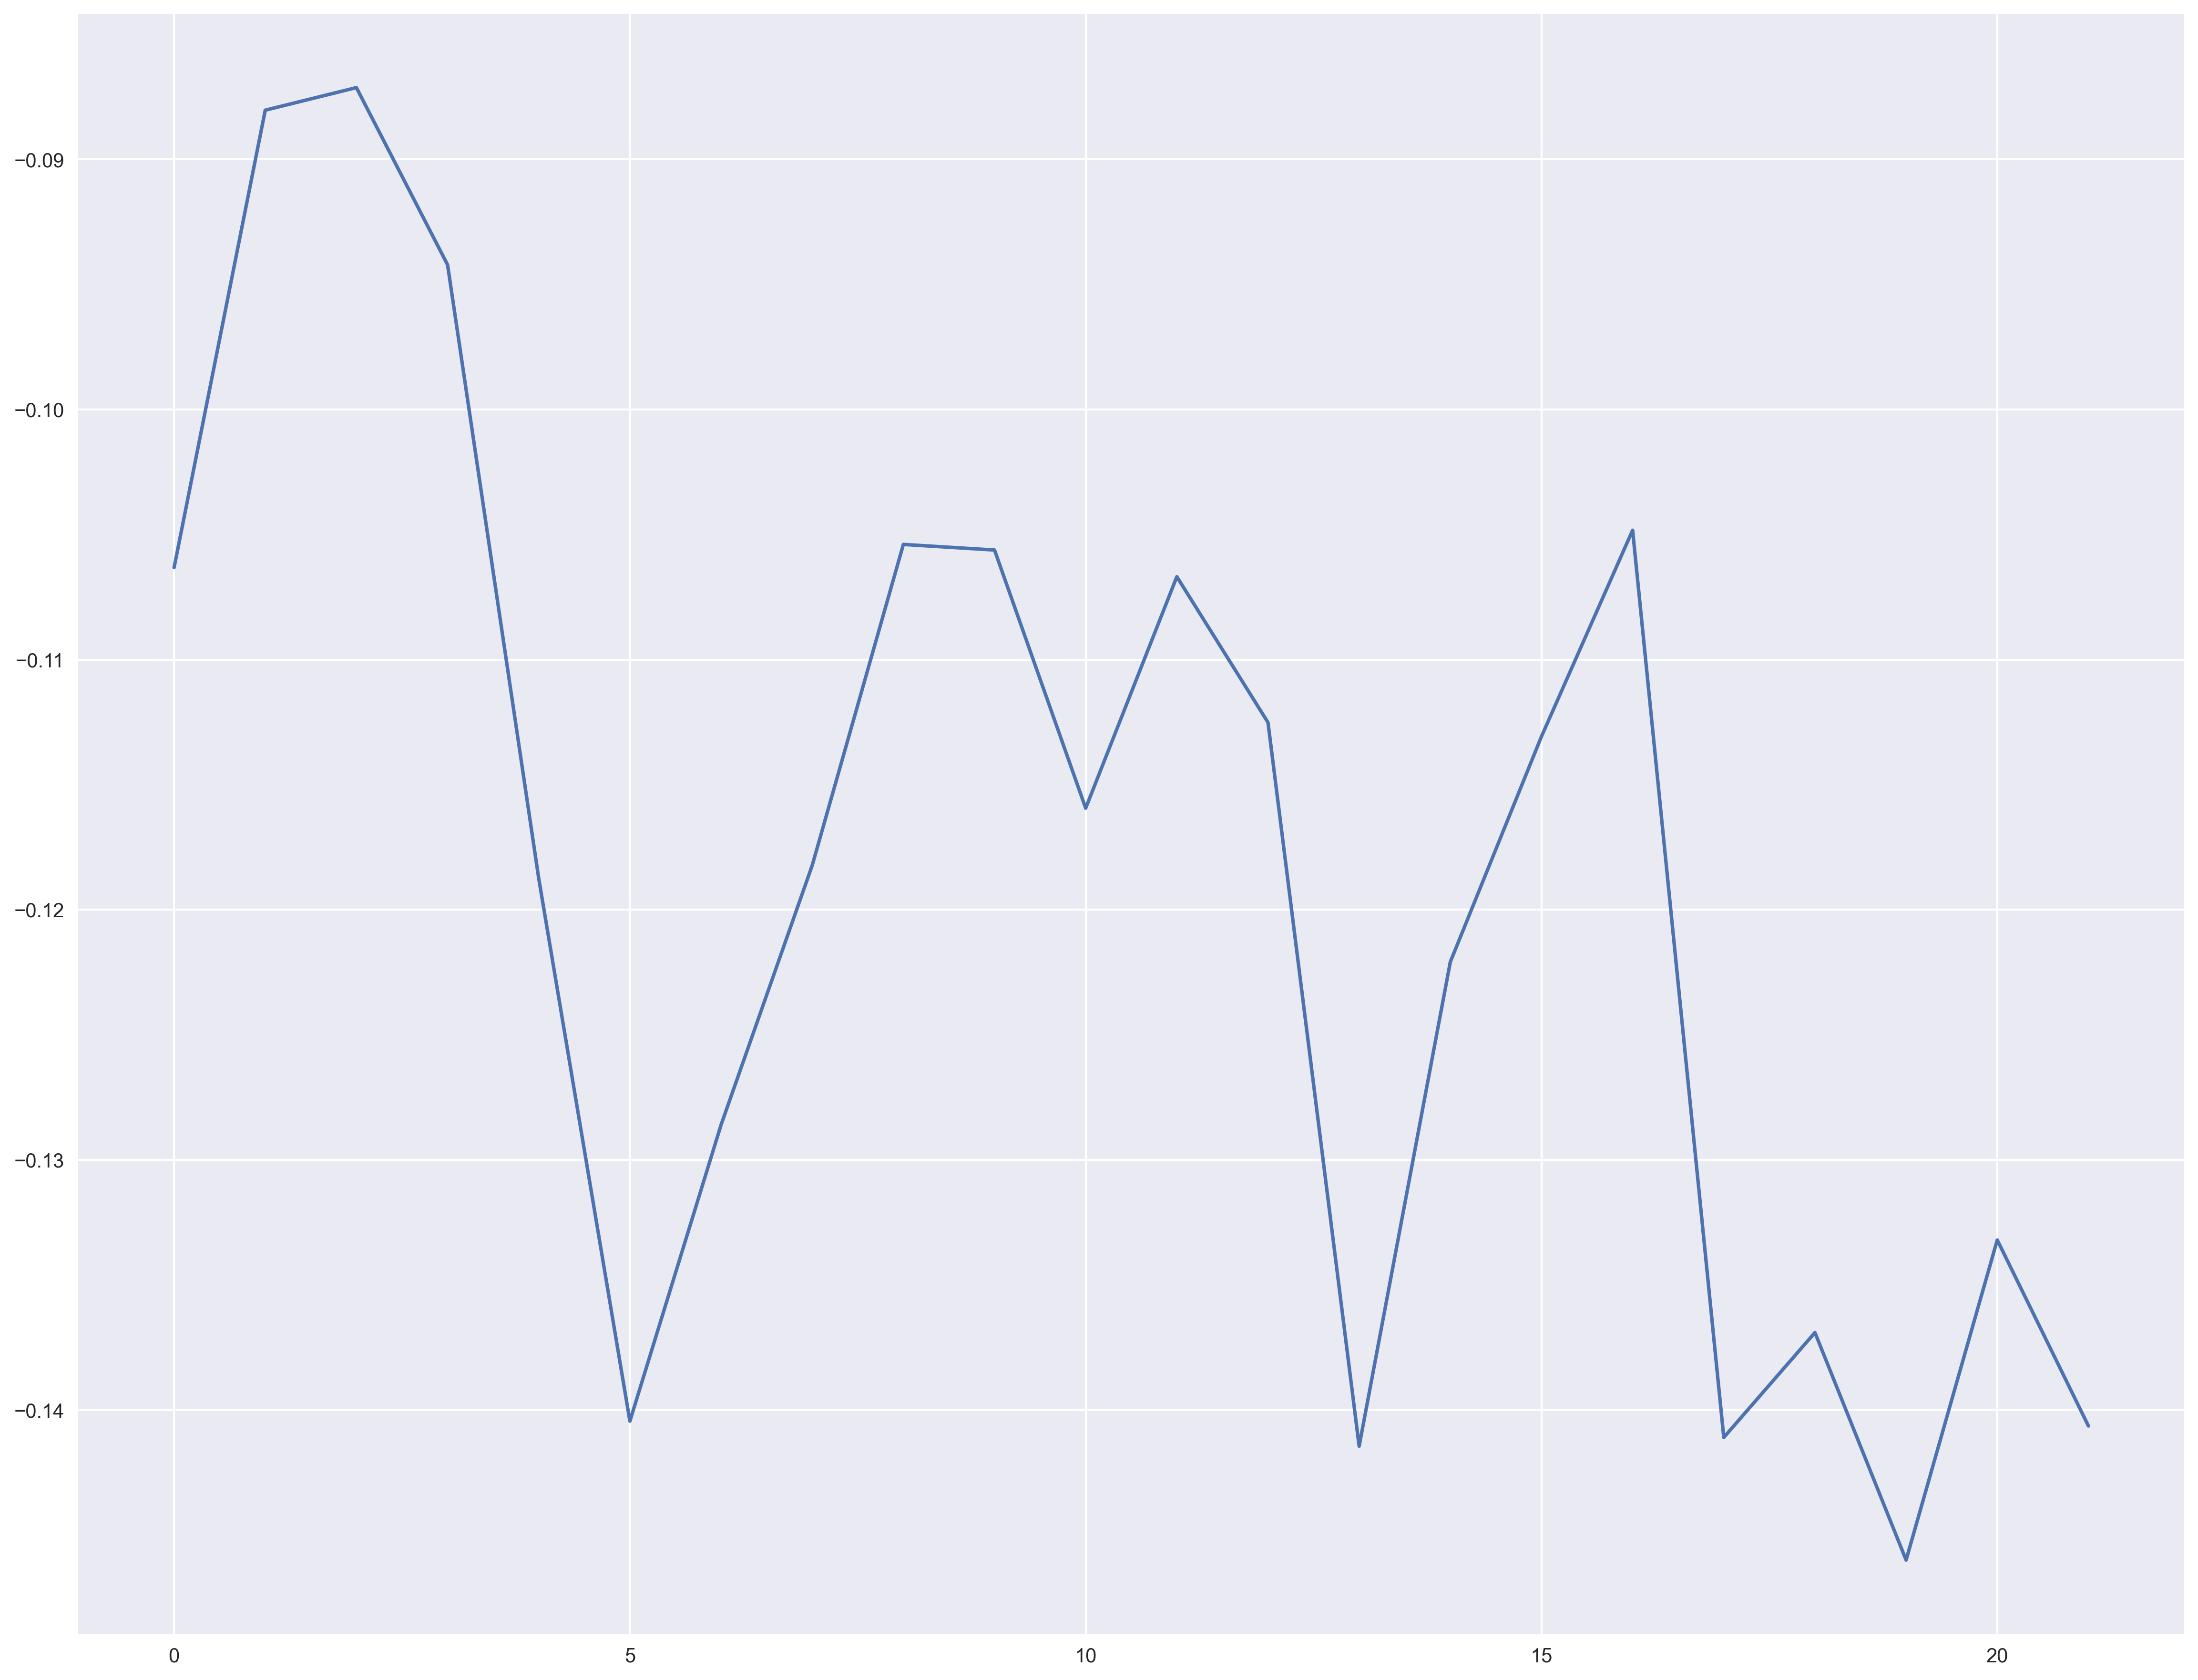

In [115]:
# Plot the movement of security

long_forward1 = np.array([0])
a1 = pd.Series(g['forward_{}x{}_{}_week{}'.format(i, j, k, week_number)][0].tolist()[0]).values
long_forward = np.append(long_forward1, a1)
long_forward = pd.Series(long_forward).cumsum().apply(np.exp)

short_forward1 = np.array([0])
b1 = pd.Series(g['forward_{}x{}_{}_week{}'.format(i, j, k, week_number)][1].tolist()[0]).values
short_forward = np.append(short_forward1, b1)
short_forward = pd.Series(short_forward).cumsum().apply(np.exp)

r_ = beta*long_forward - short_forward
r = pd.Series(r_)
r.plot();
print('Return is  ', (r[len(r)-1]-r[0]))

In [108]:
a = g['port_{}x{}_week{}'.format(i, j, week_number)]
a[k][0]

(array(['vakbn', -0.12209302325581395], dtype=object),
 array(['halkb', -0.1660130718954249], dtype=object),
 array(['sahol', -0.17415115005476456], dtype=object),
 array(['petkm', -0.17607433217189306], dtype=object))

In [109]:
a[k][1]

(array(['akbnk', -0.08005822416302766], dtype=object),)

In [ ]:
short_forward

In [ ]:
'''import statsmodels.api as sm
from statsmodels import regression

i = 4
j = 1
k = 7

x = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0][-30:]
y = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1][-30:]

x1 = sm.add_constant(x[-30:].values)
y1 = y[-30:].values
model = regression.linear_model.OLS(y1, x1).fit()
beta = model.params[1]
print(beta)'''

In [ ]:
import statsmodels.api as sm
from statsmodels import regression

i = 4
j = 1
k = 374

df = pd.DataFrame({'x':g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0][-60:], 'y':g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1][-60:]}) # dataframe of n series for cointegration analysis
jres = coint_johansen(df, det_order=0, k_ar_diff=1)
beta = -jres.evec[0][0]/jres.evec[1][0]
beta

In [ ]:
bist['sahol'][-1]

In [ ]:
'''import statsmodels.api as sm
from statsmodels import regression

i = 2
j = 1
k = 94

df = pd.DataFrame({'x':g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0][-60:], 'y':g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1][-60:]}) # dataframe of n series for cointegration analysis
jres = coint_johansen(df, det_order=0, k_ar_diff=1)
beta = -jres.evec[0][0]/jres.evec[1][0]
beta'''

In [ ]:
# KALMAN
from pykalman import KalmanFilter
x = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0]
y = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1]


delta = 1e-3
trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)

kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
                  initial_state_mean=[0,0],
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=2,
                  transition_covariance=trans_cov)
kf.em(  
    X       = x.values,  
    n_iter  = 10,  
    em_vars = [  
        'initial_state_covariance',  
        'transition_covariance',  
        'observation_covariance'  
    ]  
)
state_means, state_covs = kf.filter(y.values)
beta = state_means[-1,0]

In [ ]:
import statsmodels.api as sm
from statsmodels import regression
x = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0][-30:]
y = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1][-30:]

x1 = sm.add_constant(x[-30:].values)
y1 = y[-30:].values
model = regression.linear_model.OLS(y1, x1).fit()
beta = model.params[1]
print(beta)

In [ ]:
s_r = r_/np.std(bol_filter[-1][-30:])
s_r

In [ ]:
df = pd.DataFrame({'x':g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0][-60:], 'y':g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1][-60:]}) # dataframe of n series for cointegration analysis
jres = coint_johansen(df, det_order=0, k_ar_diff=1)
if (jres.lr1[0] > jres.cvt[0][1]) & (jres.lr1[1] > jres.cvt[1][1]) & (jres.lr2[0] > jres.cvm[0][1]) & (jres.lr2[1] > jres.cvm[1][1]):
        print('yes')

In [ ]:
bist_ = bist.resample('W').last()
bist_ = bist_w.pct_change()
bist_ = bist_w.dropna()

In [ ]:
'''import statsmodels.api as sm
from statsmodels import regression

i = 4
j = 1
k = 7

x = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][0][-30:]
y = g['backtest_{}x{}_{}_week{}'.format(i, j, k, week_number)][1][-30:]

x1 = sm.add_constant(x[-30:].values)
y1 = y[-30:].values
model = regression.linear_model.OLS(y1, x1).fit()
beta = model.params[1]
print(beta)'''

In [ ]:
port_4x4_week13[528]

In [ ]:
display_weeks

In [ ]:
port_2x2_week8[29]

In [ ]:
bist['garan'][:(17-len(bist_w))*5+1]

In [ ]:
(23-len(bist_w))*5+1

In [ ]:
bist_w['garan'][week_number-len(bist_w)]

In [ ]:
a=0
b=0
for key in range(i):
    a = a + bist_w[g['port_{}x{}_week{}'.format(i, j, week_number)][k][0][key][0]][week_number-len(bist_w)]
for key1 in range(j):
    b = b + bist_w[g['port_{}x{}_week{}'.format(i, j, week_number)][k][1][key1][0]][week_number-len(bist_w)]
    
a=a/i
b=b/j
    
r_= beta*a-b
r_= r_/(beta+1)
print(r_)